# Image filters

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from skimage import data

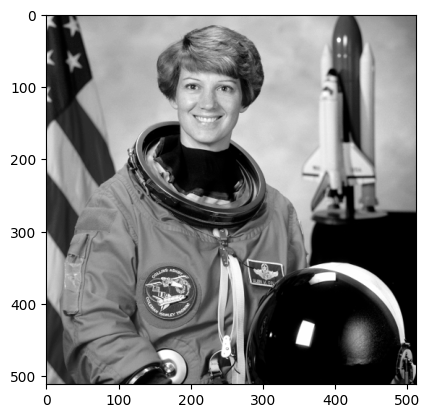

In [4]:
im = data.astronaut()
im = np.dot(im[:,:,:3], [0.2989, 0.5870, 0.1140])
plt.imshow(im, cmap='gray')
plt.show()

## Matrix convolution

From scratch

In [12]:
def convgray(im, kernel, padding=False):
    n, m = im.shape
    nk,  _ = kernel.shape
    padsize = (nk // 2) * 2
    if padding:
        nout, mout = n, m
        im1 = np.zeros((n + padsize, m + padsize))
        im1[padsize//2:-padsize//2, padsize//2:-padsize//2] = im
    else:
        nout, mout = n - padsize, m - padsize
        im1 = im.copy()
    out = np.zeros((nout, mout))
    for i in range(nout):
        for j in range(mout):
            out[i, j] = np.sum(np.multiply(im1[i:i+nk, j:j+nk],
                                           kernel))
    return out

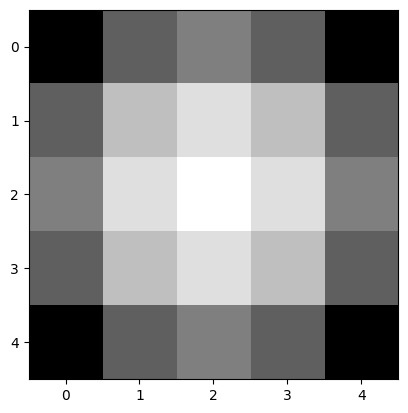

In [19]:
def gkern(l=5, sig=1.):
    """\
    creates gaussian kernel with side length `l` and a sigma of `sig`
    """
    ax = np.linspace(-(l - 1) / 2., (l - 1) / 2., l)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sig))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

k = gkern(l=5, sig=15)
plt.imshow(k, cmap='gray')
plt.show()

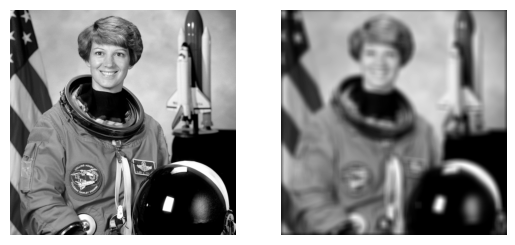

In [33]:
k = gkern(l=15, sig=15)
out = convgray(im, k, padding=True)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()

## OpenCV filtering

In [23]:
import cv2

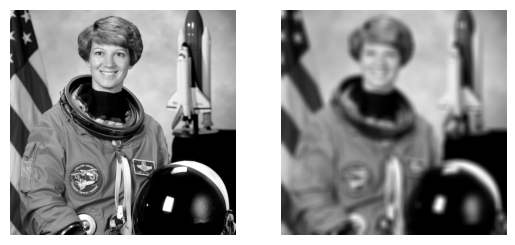

In [24]:
out = cv2.filter2D(src=im, ddepth=-1, kernel=k)
plt.subplot(121)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(122)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.show()

In [25]:
%timeit convgray(im, k)

2.43 s ± 36.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [26]:
%timeit cv2.filter2D(src=im, ddepth=-1, kernel=k)

11.2 ms ± 59.4 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Average filter

In [40]:
import random

imsp = im.copy()
n, m = imsp.shape
for i in range(n):
    for j in range(m):
        if random.randint(1, 100) < 2:
            imsp[i, j] = 0 if random.randint(1, 100) < 50 else 1

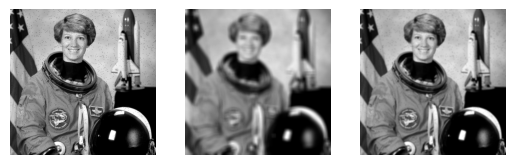

In [42]:
meank = np.ones((5, 5)) / 25
out = cv2.filter2D(src=imsp, ddepth=-1, kernel=k)
outsp = cv2.filter2D(src=imsp, ddepth=-1, kernel=meank)

plt.subplot(131)
plt.imshow(imsp, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(outsp, cmap='gray')
plt.axis('off')
plt.show()

## Edge detection

In [44]:
k = np.array([[-1]*3, [0]*3, [1]*3])
print(k)

[[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


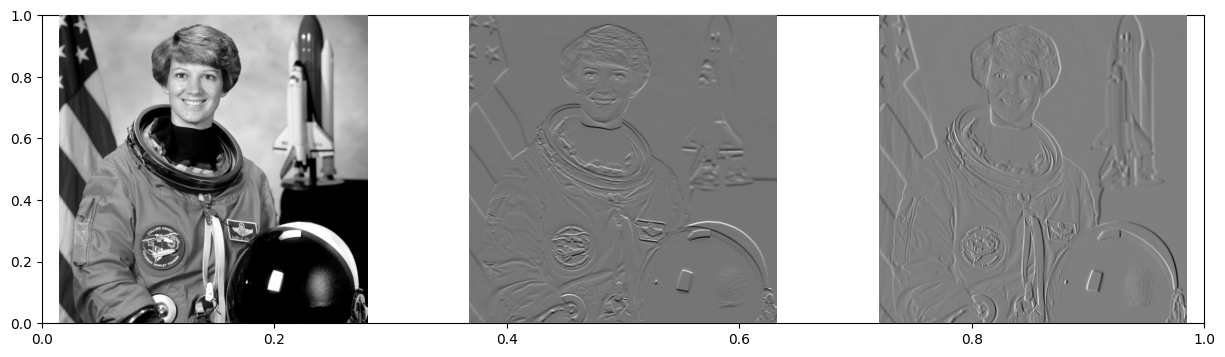

In [50]:
out = cv2.filter2D(src=im, ddepth=-1, kernel=k)
k = k.transpose()
out2 = cv2.filter2D(src=im, ddepth=-1, kernel=k)

plt.subplots(figsize=(15, 4))
plt.subplot(131)
plt.imshow(im, cmap='gray')
plt.axis('off')
plt.subplot(132)
plt.imshow(out, cmap='gray')
plt.axis('off')
plt.subplot(133)
plt.imshow(out2, cmap='gray')
plt.axis('off')
plt.show()